In [1]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
#%matplotlib notebook
%matplotlib inline

import csv
from collections import defaultdict
import re

In [2]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

### Useful Functions for Data Standardization

In [3]:
def clean_cols(df):
    for col in df.columns:
        # Clean the string type data
        if df[col].dtype == 'object':
            df[col]= df[col].str.strip()
    return df

def make_standard_names(df):
    # Clean up the column names
    cols = df.columns
    for col in cols:
        col_new = col
        col_new = col_new.lower()
        col_new = col_new.strip()
        col_new = col_new.replace('/','')
        col_new = col_new.replace(' ','_')
        df = df.rename(columns = {col: col_new})
    return df

### NYC Transit Subway Entrance And Exit Data


In [4]:
# This data file provides a variety of information on subway station entrances and exits which includes but is not limited to: 
# Division, Line, Station Name, Longitude and Latitude coordinates of entrances/exits.
nyc_entr_exit = pd.read_csv("https://data.ny.gov/api/views/i9wp-a4ja/rows.csv")

In [5]:
print(nyc_entr_exit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 32 columns):
Division              1868 non-null object
Line                  1868 non-null object
Station Name          1868 non-null object
Station Latitude      1868 non-null float64
Station Longitude     1868 non-null float64
Route1                1868 non-null object
Route2                1020 non-null object
Route3                494 non-null object
Route4                321 non-null object
Route5                238 non-null object
Route6                127 non-null object
Route7                80 non-null object
Route8                48 non-null float64
Route9                28 non-null float64
Route10               23 non-null float64
Route11               23 non-null float64
Entrance Type         1868 non-null object
Entry                 1868 non-null object
Exit Only             56 non-null object
Vending               1868 non-null object
Staffing              1868 non-null object


In [6]:
nyc_entr_exit.sample(5)

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
951,IND,Crosstown,Clinton-Washington Avs,40.688,-73.967,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,NO,NaN,NO,FULL,NaN,False,NaN,True,Clinton Ave,Lafayette Ave,SW,40.688,-73.968,"(40.688089, -73.966839)","(40.687875, -73.967931)"
1503,IRT,Nostrand,Flatbush Av-Brooklyn College,40.633,-73.948,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,True,NaN,True,Nostrand Ave,Flatbush Ave,NE,40.633,-73.948,"(40.632836, -73.947642)","(40.632868, -73.947547)"
1497,IRT,Nostrand,Church Av,40.651,-73.950,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,True,NaN,False,Nostrand Ave,Church Ave,NW,40.651,-73.950,"(40.650843, -73.949575)","(40.650894, -73.949819)"
1110,IRT,Flushing,Lowery St-40th St,40.744,-73.924,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,40th St,Queens Blvd,NW,40.744,-73.924,"(40.743781, -73.924016)","(40.743911, -73.924385)"
93,IND,6 Avenue,42nd St,40.754,-73.985,B,D,F,M,7,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,6th Ave,42nd St,SE,40.755,-73.984,"(40.754222, -73.984569)","(40.754609, -73.983894)"


### Turnstile Usage Data 2017

In [7]:
### Turnstile Usage Data: 2017
# State of New York — Data file contains information on entry/exit register values for individual control areas.
#nyc_turnstile_2017 = pd.read_csv("https://data.ny.gov/api/views/v5y5-mwpb/rows.csv")
nyc_turnstile_2017 = pd.read_csv('turnstile_data/Turnstile_Usage_Data__2017.csv')

In [8]:
nyc_turnstile_2017 = nyc_turnstile_2017.iloc[0:round(np.shape(nyc_turnstile_2017)[0])]

In [9]:
nyc_turnstile_2017 = clean_cols(nyc_turnstile_2017)
nyc_turnstile_2017 = make_standard_names(nyc_turnstile_2017)

In [29]:
# Calculate entries and exists per period
nyc_turnstile_2017['entries_diff'] = nyc_turnstile_2017['entries'].diff()
nyc_turnstile_2017['exits_diff'] = nyc_turnstile_2017['exits'].diff()

nyc_turnstile_2017[nyc_turnstile_2017['entries_diff'] < 0] = np.nan
nyc_turnstile_2017[nyc_turnstile_2017['exits_diff'] < 0] = np.nan
nyc_turnstile_2017[nyc_turnstile_2017['entries_diff'] > 10**5] = np.nan
nyc_turnstile_2017[nyc_turnstile_2017['exits_diff'] > 10**5] = np.nan

In [30]:
# Make a Datetime Column
nyc_turnstile_2017['dtime'] = nyc_turnstile_2017['date'] + ' ' + nyc_turnstile_2017['time']
nyc_turnstile_2017['dtime'] = pd.to_datetime(nyc_turnstile_2017['dtime'], format='%m/%d/%Y %H:%M:%S')

In [31]:
# plot one sample timeseries

single_station = nyc_turnstile_2017[nyc_turnstile_2017.station == '59 ST']


<IPython.core.display.Javascript object>


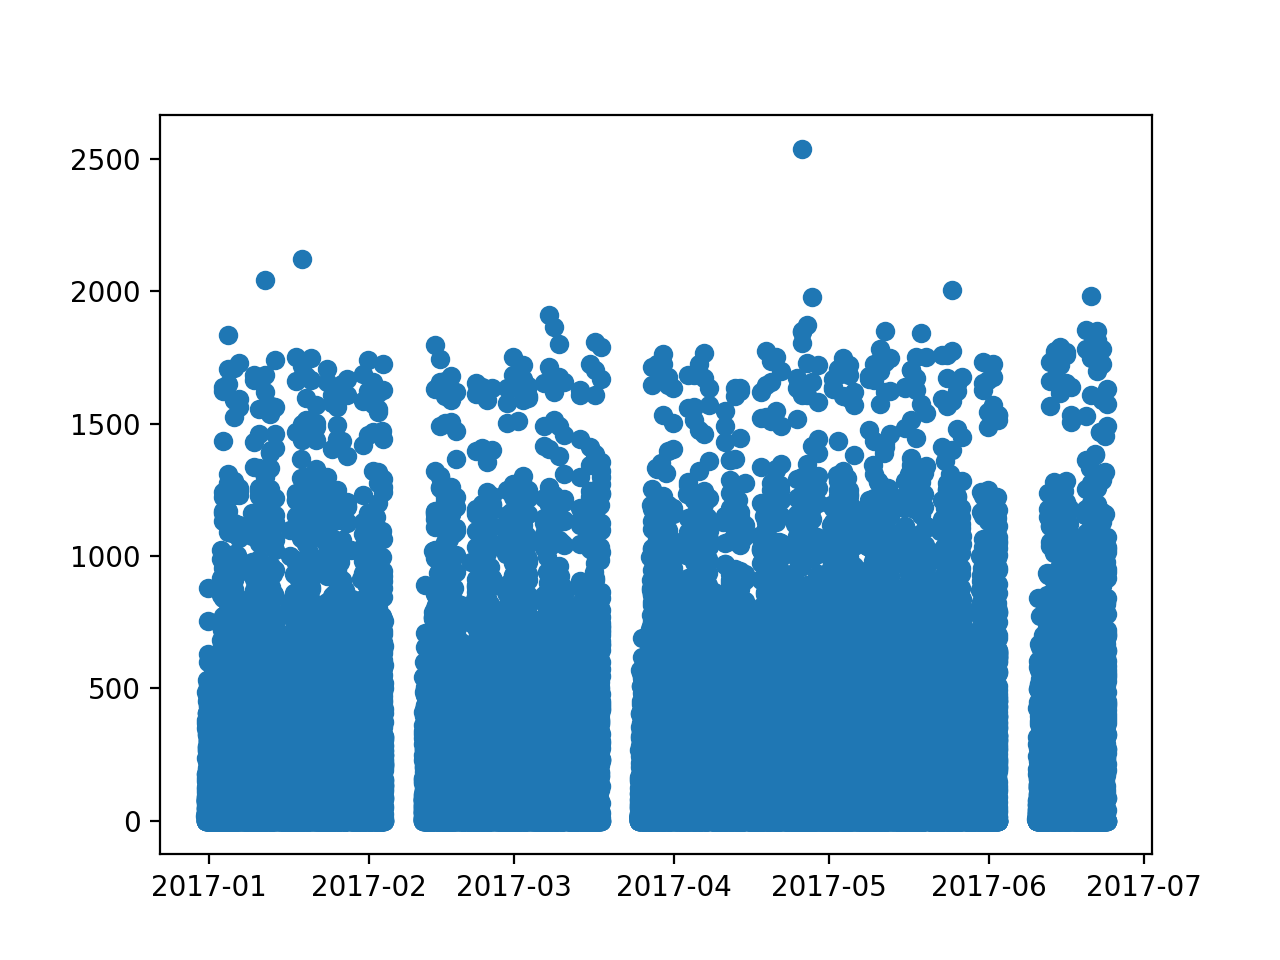

In [32]:
plt.plot(single_station['dtime'],single_station['entries_diff'],marker = 'o',linestyle='None')